# 1. Audiobooks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/peerkart

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/peerkart


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf

# 2. Import file
* read the csv file
* do the train, test and vali split
* create dataframes for inputs and targets

In [ ]:
df = pd.read_csv('01_preprocessing.csv')
train_inputs = df[df['flag']=='Training'].drop(['flag','11'], axis=1)
train_targets = df[df['flag']=='Training'][['11']]
print(train_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
test_inputs = df[df['flag']=='Test'].drop(['flag','11'], axis=1)
test_targets = df[df['flag']=='Test'][['11']]
print(test_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
validation_inputs = df[df['flag']=='Validate'].drop(['flag','11'], axis=1)
validation_targets = df[df['flag']=='Validate'][['11']]
print(validation_inputs.shape)

(16122, 10)
(2303, 10)
(4607, 10)


# 3. Model
Outline, optimizers, loss, early stopping and training

In [ ]:
input_size = 10
output_size = 2
hidden_layer_size = 15
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax') # output layer
                             ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 400
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
tf.keras.utils.set_random_seed(108)
tf.config.experimental.enable_op_determinism()

history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                    validation_data=(validation_inputs, validation_targets), verbose = 2)

Epoch 1/100
41/41 - 2s - loss: 0.7025 - accuracy: 0.5455 - val_loss: 0.6380 - val_accuracy: 0.6418 - 2s/epoch - 45ms/step
Epoch 2/100
41/41 - 0s - loss: 0.6020 - accuracy: 0.6931 - val_loss: 0.5574 - val_accuracy: 0.7356 - 292ms/epoch - 7ms/step
Epoch 3/100
41/41 - 0s - loss: 0.5284 - accuracy: 0.7458 - val_loss: 0.4933 - val_accuracy: 0.7619 - 225ms/epoch - 5ms/step
Epoch 4/100
41/41 - 0s - loss: 0.4739 - accuracy: 0.7640 - val_loss: 0.4483 - val_accuracy: 0.7779 - 209ms/epoch - 5ms/step
Epoch 5/100
41/41 - 0s - loss: 0.4390 - accuracy: 0.7793 - val_loss: 0.4232 - val_accuracy: 0.7853 - 233ms/epoch - 6ms/step
Epoch 6/100
41/41 - 0s - loss: 0.4194 - accuracy: 0.7864 - val_loss: 0.4079 - val_accuracy: 0.7912 - 216ms/epoch - 5ms/step
Epoch 7/100
41/41 - 0s - loss: 0.4066 - accuracy: 0.7892 - val_loss: 0.3976 - val_accuracy: 0.7953 - 275ms/epoch - 7ms/step
Epoch 8/100
41/41 - 0s - loss: 0.3973 - accuracy: 0.7954 - val_loss: 0.3897 - val_accuracy: 0.7970 - 240ms/epoch - 6ms/step
Epoch 9/10

# 4. Model Loss

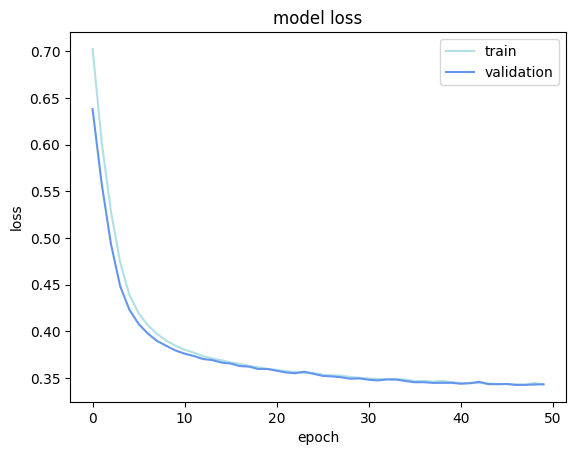

In [ ]:
plt.plot(history.history['loss'], color='powderblue')
plt.plot(history.history['val_loss'], color='cornflowerblue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 5. Test

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

72/72 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8328

Test loss: 0.32. Test accuracy: 83.28%
